In [2]:
library(data.table)
library(car)
library(ggplot2)
library(lattice)
library(survival)
library(goftest)
library(MASS)
library(leaps)
library(nortest)


Attaching package: ‘nortest’

The following objects are masked from ‘package:goftest’:

    ad.test, cvm.test



In [3]:
a <- fread('http://ww2.amstat.org/publications/jse/datasets/baseball.dat.txt')
colnames(a) <- c('Salary', 'BattingAverage', 'OBP', 'NumRuns', 
                   'NumHits', 'NumDoubles', 'NumTriples', 'HomeRuns', 'RBI', 'NumWalks',
                   'NumStrikeOuts', 'StolenBases', 'NumErrors', 'FreeAgencyEligibility',
                   'FreeAgent1', 'ArbitrationEligibility', 'Arbitration1'
                   ,'PlayerName')
a

Salary,BattingAverage,OBP,NumRuns,NumHits,NumDoubles,NumTriples,HomeRuns,RBI,NumWalks,NumStrikeOuts,StolenBases,NumErrors,FreeAgencyEligibility,FreeAgent1,ArbitrationEligibility,Arbitration1,PlayerName
3300,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0,Andre Dawson
2600,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0,Steve Buchele
2500,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0,Kal Daniels
2475,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0,Shawon Dunston
2313,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0,Mark Grace
2175,0.291,0.379,104,170,32,2,26,100,87,89,22,4,1,0,0,0,Ryne Sandberg
600,0.258,0.370,34,86,14,1,14,38,15,45,0,10,1,0,0,0,Luis Salazar
460,0.228,0.279,16,38,7,2,3,21,11,32,2,3,0,0,0,0,Dwight Smith
240,0.250,0.327,40,61,11,0,1,18,24,26,14,2,0,0,0,0,Doug Dascenzo
200,0.203,0.240,39,64,10,1,10,33,14,96,13,6,0,0,0,0,Sammy Sosa


In [4]:
summary(a)

     Salary     BattingAverage        OBP           NumRuns     
 Min.   : 109   Min.   :0.0630   Min.   :0.063   Min.   :  0.0  
 1st Qu.: 230   1st Qu.:0.2380   1st Qu.:0.297   1st Qu.: 22.0  
 Median : 740   Median :0.2600   Median :0.323   Median : 41.0  
 Mean   :1249   Mean   :0.2578   Mean   :0.324   Mean   : 46.7  
 3rd Qu.:2150   3rd Qu.:0.2810   3rd Qu.:0.354   3rd Qu.: 69.0  
 Max.   :6100   Max.   :0.4570   Max.   :0.486   Max.   :133.0  
    NumHits         NumDoubles      NumTriples        HomeRuns     
 Min.   :  1.00   Min.   : 0.00   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 51.00   1st Qu.: 9.00   1st Qu.: 0.000   1st Qu.: 2.000  
 Median : 91.00   Median :15.00   Median : 2.000   Median : 6.000  
 Mean   : 92.83   Mean   :16.67   Mean   : 2.338   Mean   : 9.098  
 3rd Qu.:136.00   3rd Qu.:23.00   3rd Qu.: 3.000   3rd Qu.:15.000  
 Max.   :216.00   Max.   :49.00   Max.   :15.000   Max.   :44.000  
      RBI            NumWalks      NumStrikeOuts     StolenBases    


In [10]:
fit <- lm(Salary ~ BattingAverage + OBP + NumRuns + NumHits + NumDoubles + NumTriples + 
          HomeRuns + RBI + NumWalks + NumStrikeOuts + StolenBases + NumErrors + as.factor(FreeAgencyEligibility)
        + as.factor(FreeAgent1) + as.factor(ArbitrationEligibility) + as.factor(Arbitration1), data = a)
summary(fit)


Call:
lm(formula = Salary ~ BattingAverage + OBP + NumRuns + NumHits + 
    NumDoubles + NumTriples + HomeRuns + RBI + NumWalks + NumStrikeOuts + 
    StolenBases + NumErrors + as.factor(FreeAgencyEligibility) + 
    as.factor(FreeAgent1) + as.factor(ArbitrationEligibility) + 
    as.factor(Arbitration1), data = a)

Residuals:
    Min      1Q  Median      3Q     Max 
-1908.3  -463.0    10.9   340.7  3181.7 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          223.115    332.717   0.671 0.502970    
BattingAverage                      3043.192   2712.536   1.122 0.262746    
OBP                                -3528.013   2376.084  -1.485 0.138581    
NumRuns                                7.100      5.643   1.258 0.209259    
NumHits                               -2.698      3.312  -0.815 0.415788    
NumDoubles                             1.368      8.611   0.159 0.873846    
NumTriples                        

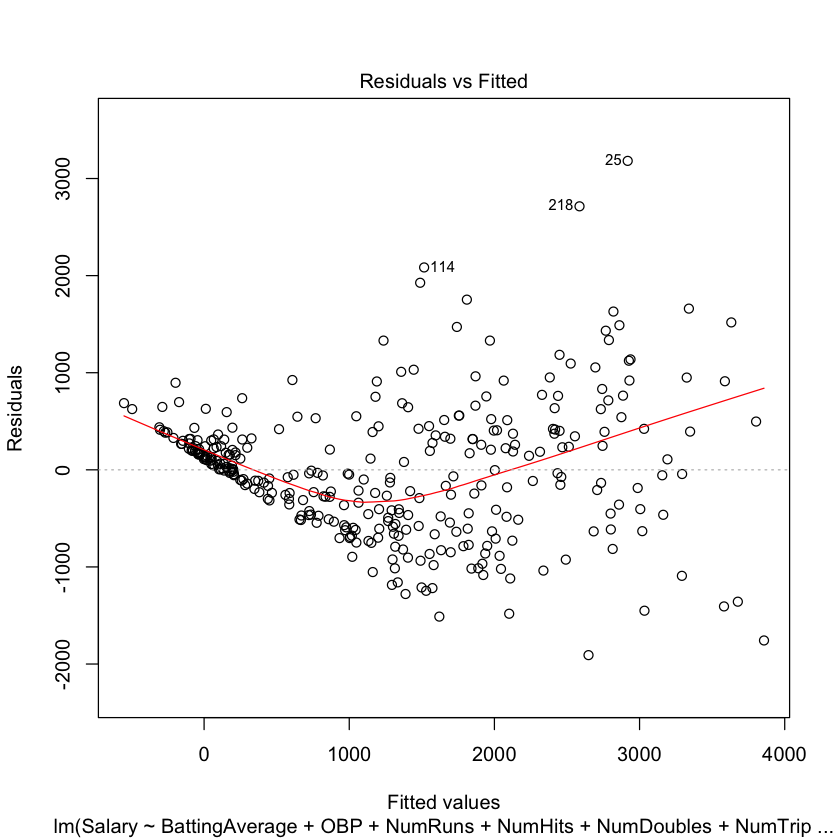

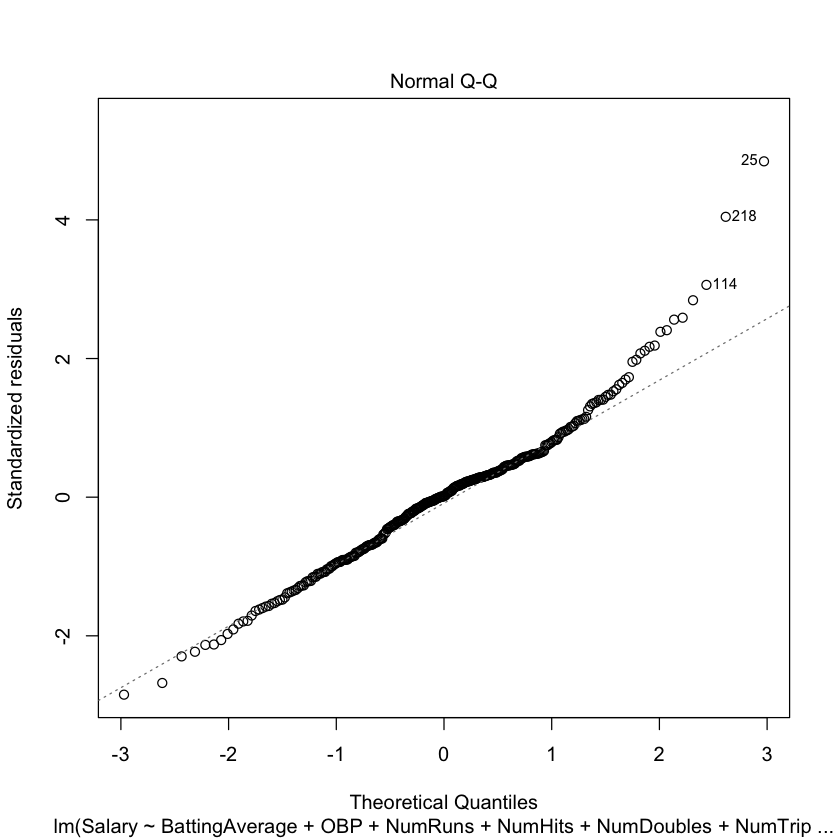

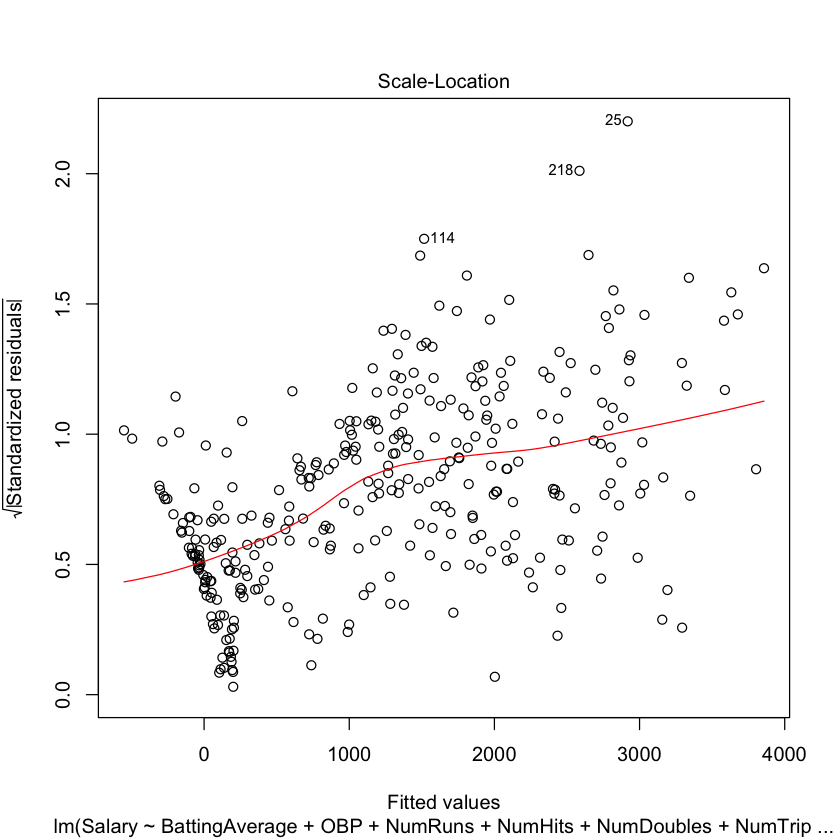

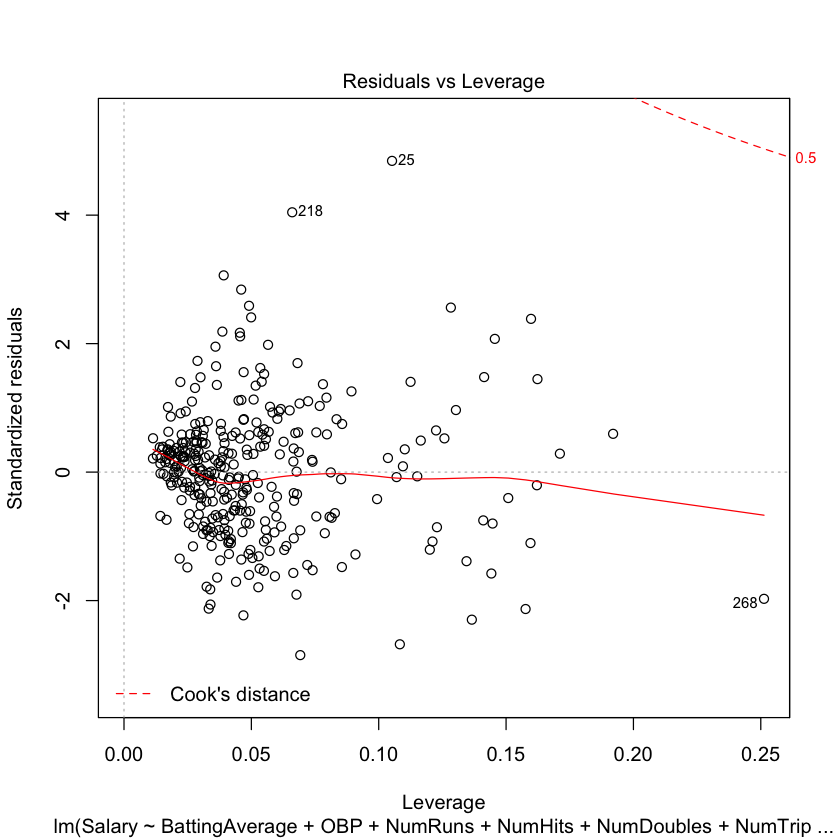

In [11]:
plot(fit)

ERROR: Error in sort.int(x, na.last = na.last, decreasing = decreasing, ...): 'x' must be atomic


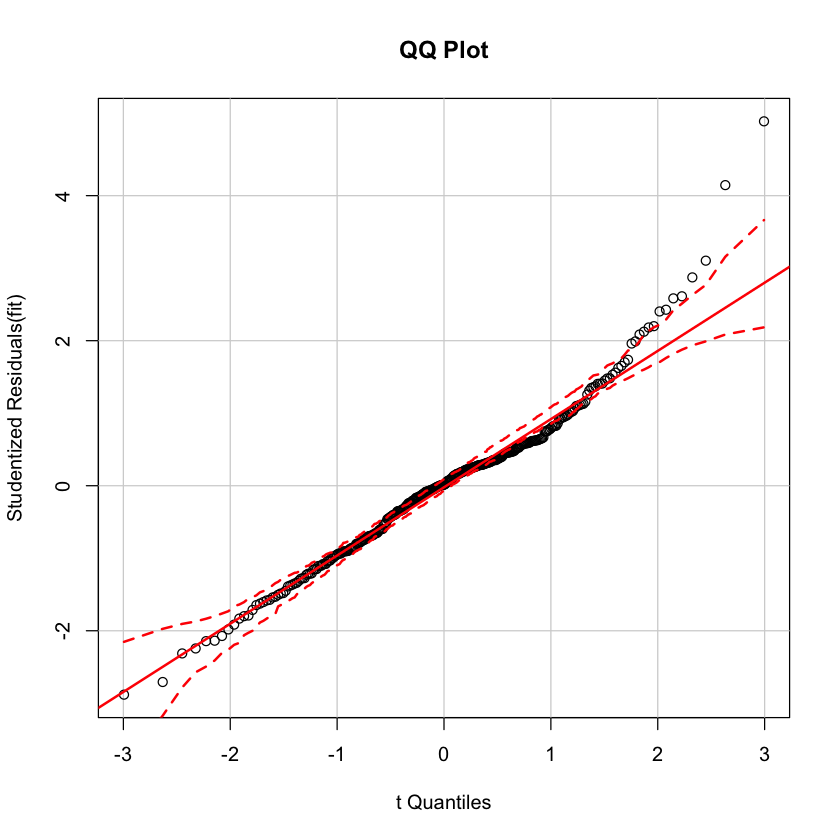

In [12]:
qqPlot(fit, main="QQ Plot")
qqline(fit)


	Anderson-Darling normality test

data:  resid(fit)
A = 1.7771, p-value = 0.0001484


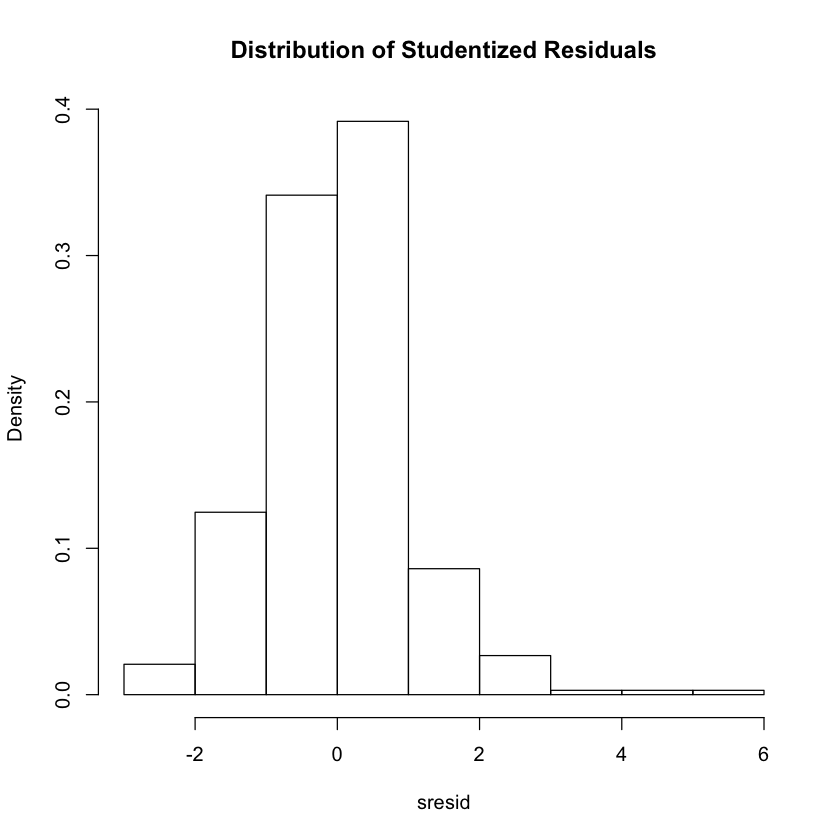

In [13]:
sresid <- studres(fit) 
hist(sresid, freq=FALSE, 
   main="Distribution of Studentized Residuals")
ad.test(resid(fit))

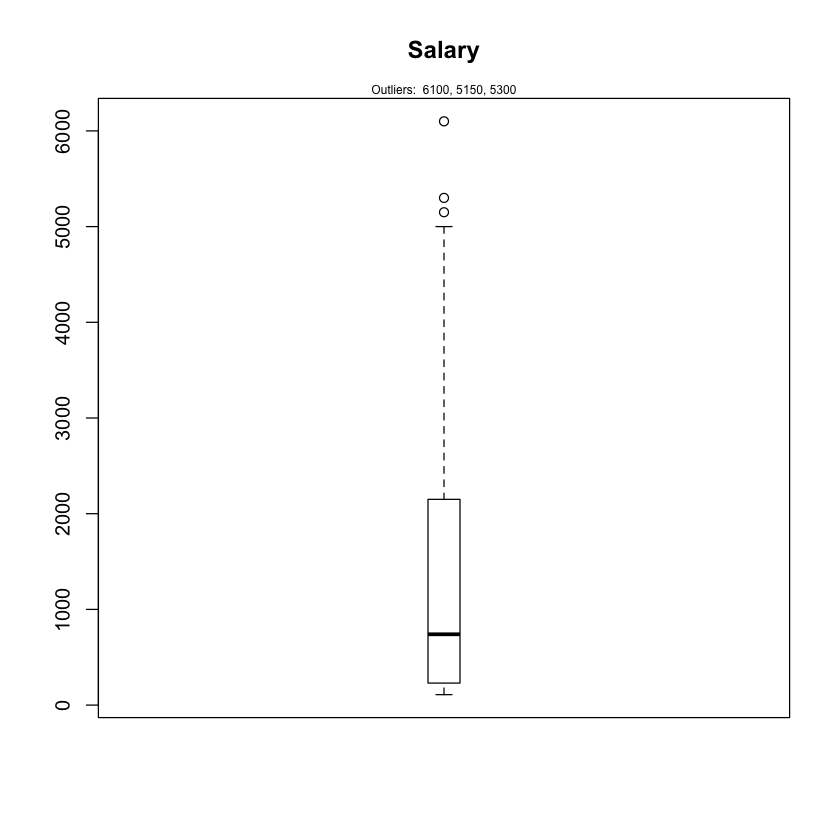

In [14]:
outlier_values <- boxplot.stats(a$Salary)$out  # outlier values.
boxplot(a$Salary, main="Salary", boxwex=0.1)
mtext(paste("Outliers: ", paste(outlier_values, collapse=", ")), cex=0.6)

Outliers identified: 3 nPropotion (%) of outliers: 0.9 nMean of the outliers: 5516.67 nMean without removing outliers: 1248.53 nMean if we remove outliers: 1210.19 nDo you want to remove outliers and to replace with NA? [yes/no]: 
Nothing changed n

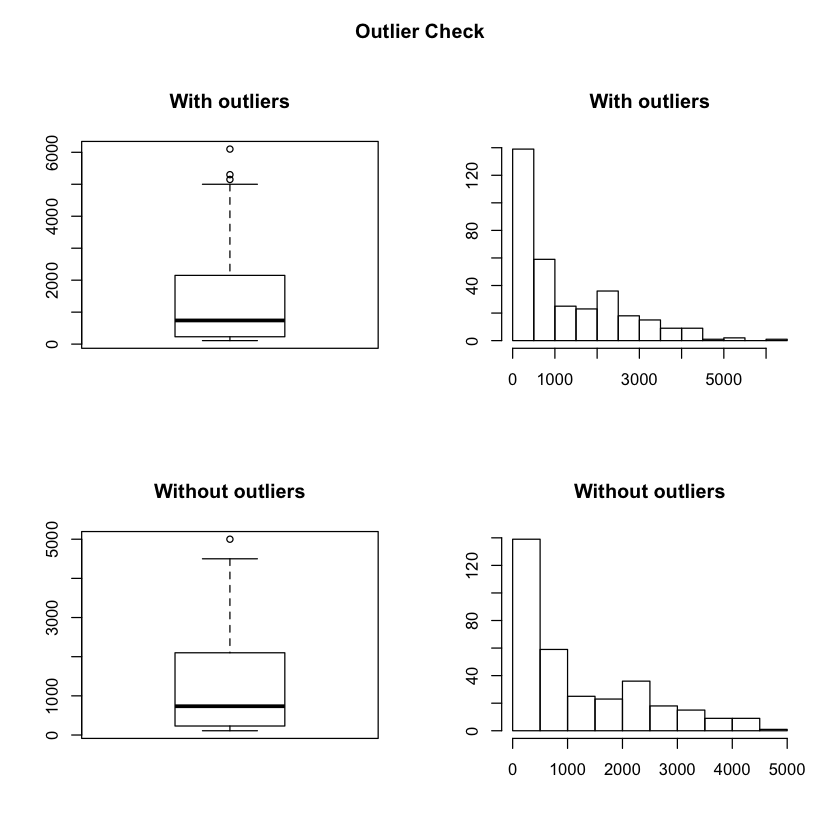

In [16]:
outlierKD <- function(dt, var) {
     Salary <- eval(substitute(var),eval(dt))
     na1 <- sum(is.na(Salary))
     m1 <- mean(Salary, na.rm = T)
     par(mfrow=c(2, 2), oma=c(0,0,3,0))
     boxplot(Salary, main="With outliers")
     hist(Salary, main="With outliers", xlab=NA, ylab=NA)
     outlier <- boxplot.stats(Salary)$out
     mo <- mean(outlier)
     Salary <- ifelse(Salary %in% outlier, NA, Salary)
     boxplot(Salary, main="Without outliers")
     hist(Salary, main="Without outliers", xlab=NA, ylab=NA)
     title("Outlier Check", outer=TRUE)
     na2 <- sum(is.na(Salary))
     cat("Outliers identified:", na2 - na1, "n")
     cat("Propotion (%) of outliers:", round((na2 - na1) / sum(!is.na(Salary))*100, 1), "n")
     cat("Mean of the outliers:", round(mo, 2), "n")
     m2 <- mean(Salary, na.rm = T)
     cat("Mean without removing outliers:", round(m1, 2), "n")
     cat("Mean if we remove outliers:", round(m2, 2), "n")
     response <- readline(prompt="Do you want to remove outliers and to replace with NA? [yes/no]: ")
     if(response == "y" | response == "yes"){
          dt[as.character(substitute(var))] <- invisible(Salary)
          assign(as.character(as.list(match.call())$dt), dt, envir = .GlobalEnv)
          cat("Outliers successfully removed", "n")
          return(invisible(dt))
     } else{
          cat("Nothing changed", "n")
          return(invisible(Salary))
     }
}

outlierKD(a, Salary)